## Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

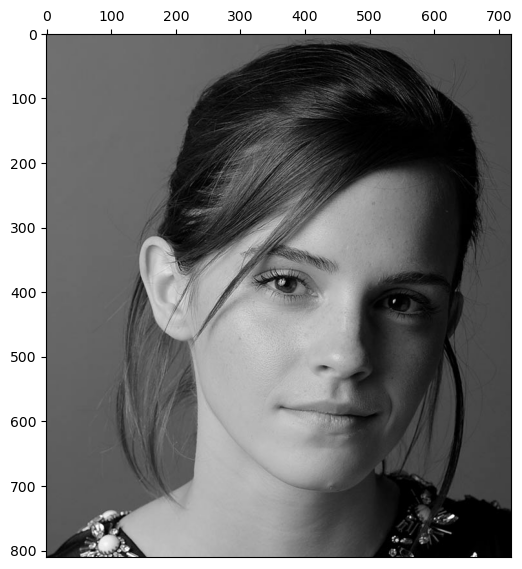

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread('Assigment_1\\a1images\\a1images\\emma.jpg',cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()



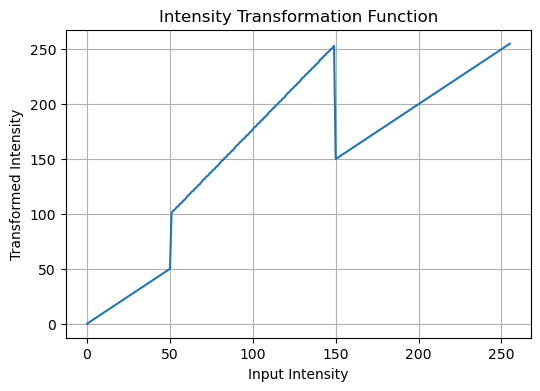

In [3]:
def intensity_transformation(im):
    mask= (im > 50) & (im < 150)
    trasformed_image = im.copy()
    trasformed_image[mask] = (255-100)/(150-50) * im[mask] + (100-(255-100)/100 * 50)
    return trasformed_image

x = np.arange(0, 256)
y = intensity_transformation(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation Function')
plt.grid(True)
plt.show()

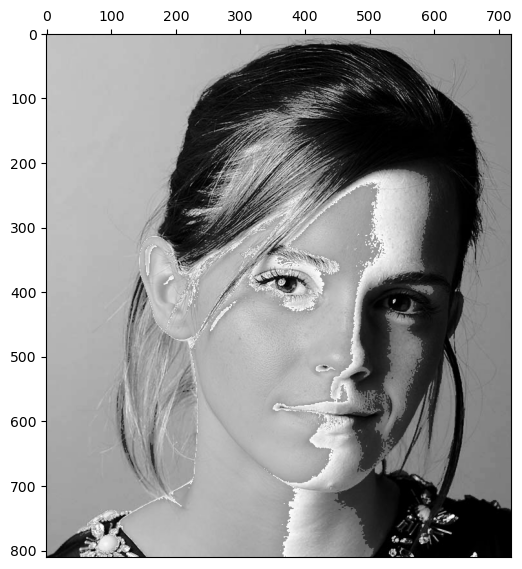

In [4]:
traformed_image =intensity_transformation(im)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

## Question 2

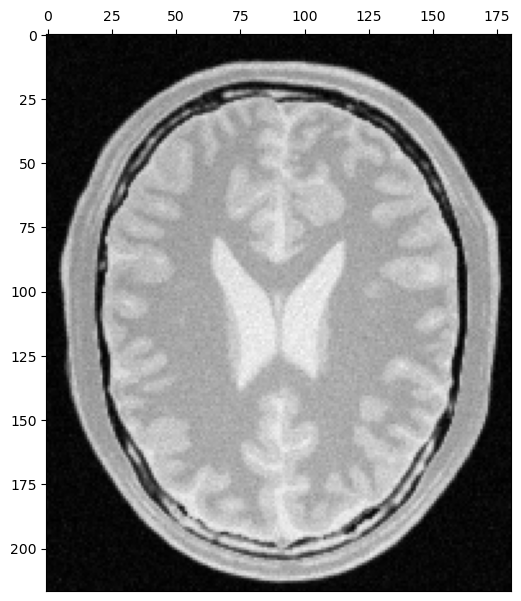

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread('Assigment_1\\a1images\\a1images\\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

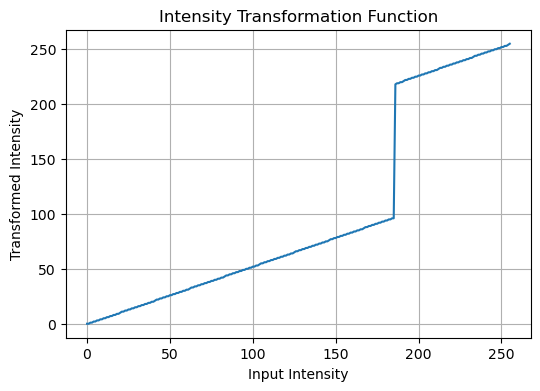

In [6]:
def gray_white_identify(im):
    mask= (im > 185) 
    trasformed_image = im.copy()

    m=(255-200)/(255-150)
    trasformed_image[mask] =m* im[mask] + (255-m*255)
    trasformed_image[~mask] =m* im[~mask]  # Set all other pixels to 0
    return trasformed_image

x = np.arange(0, 256)
y =  gray_white_identify(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation Function')
plt.grid(True)
plt.show()

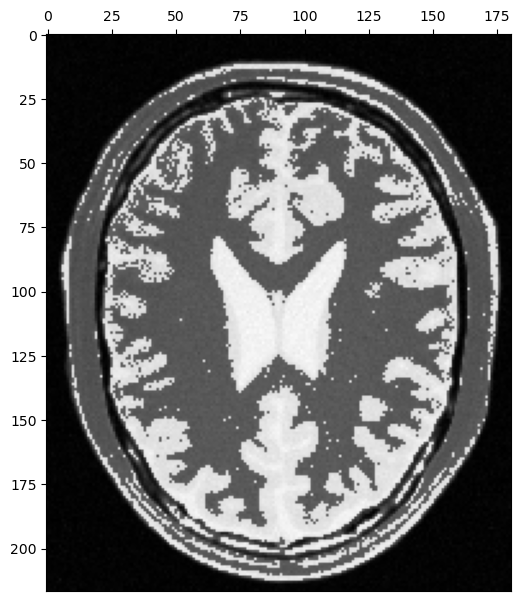

In [7]:
traformed_image = gray_white_identify(im)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

## Question 3

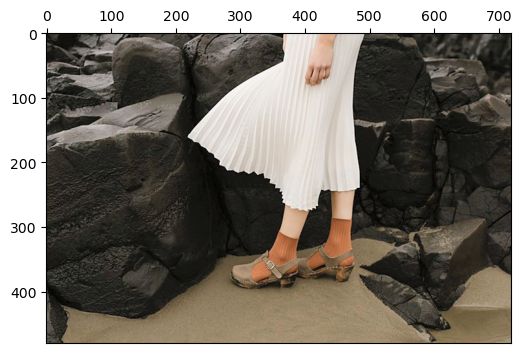

In [8]:
# Load the image
im= cv.imread('Assigment_1\\a1images\\a1images\\highlights_and_shadows.jpg')
l,a,b= cv.split(cv.cvtColor(im, cv.COLOR_BGR2LAB))

gamma = 0.75

t= ((np.arange(0, 256)/255)**gamma*255).astype(np.uint8)
l_transformed = cv.LUT(l, t)

traformed_image = cv.cvtColor(cv.merge((l_transformed, a, b)),cv.COLOR_Lab2BGR)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()


Histogram

In [9]:
def gamma_correction(l, gamma=1):
    t= ((np.arange(0, 256)/255)**gamma*255).astype(np.uint8)
    l_transformed = cv.LUT(l, t)
    return l_transformed



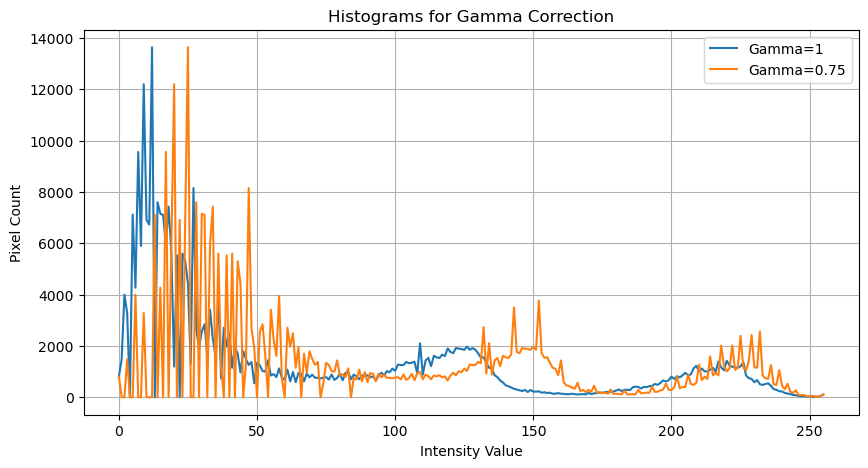

In [10]:
histrograms= [[np.sum(gamma_correction(l, gamma) == i) for i in range(256)] for gamma in [1,0.75]]
plt.figure(figsize=(10, 5))
for idx, gamma in enumerate([1, 0.75]):
    plt.plot(range(256), histrograms[idx], label=f'Gamma={gamma}')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.title('Histograms for Gamma Correction')
plt.legend()
plt.grid(True)
plt.show()

# Question 4

In [11]:
im= cv.imread('Assigment_1\\a1images\\a1images\\spider.png')

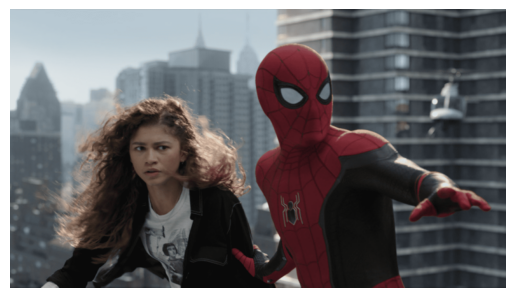

In [12]:
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

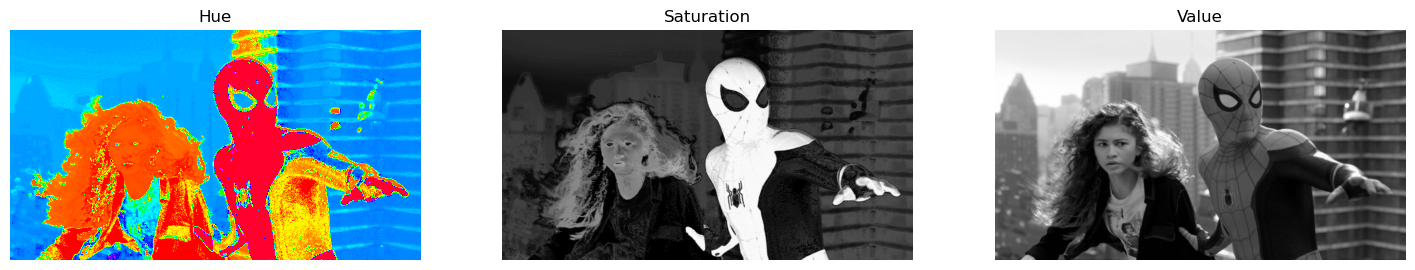

In [13]:
#1. Convert the image to HSV color space and split into H, S, V planes
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h, s, v = cv.split(im_hsv)

# Display the H, S, V planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(h, cmap='hsv')
axes[0].set_title('Hue')
axes[1].imshow(s, cmap='gray')
axes[1].set_title('Saturation')
axes[2].imshow(v, cmap='gray')
axes[2].set_title('Value')
for ax in axes:
    ax.axis('off')
plt.show()

In [14]:
t= lambda x,a=1,sigma=70 : np.minimum(x + a*128*np.exp(-(x-128)**2/(2*sigma**2)), 255).astype(np.uint8)


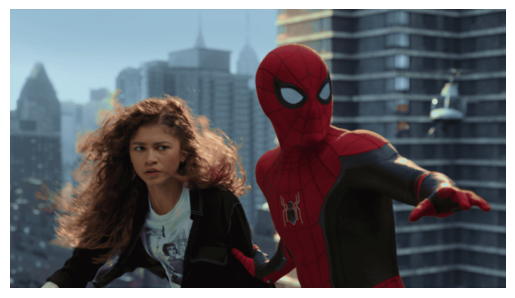

In [15]:
new_s=t(s,a=0.3)
t_im=cv.merge((h,new_s,v))
t_im=cv.cvtColor(t_im,cv.COLOR_HSV2RGB)

plt.imshow(t_im)
plt.axis('off')
plt.show()

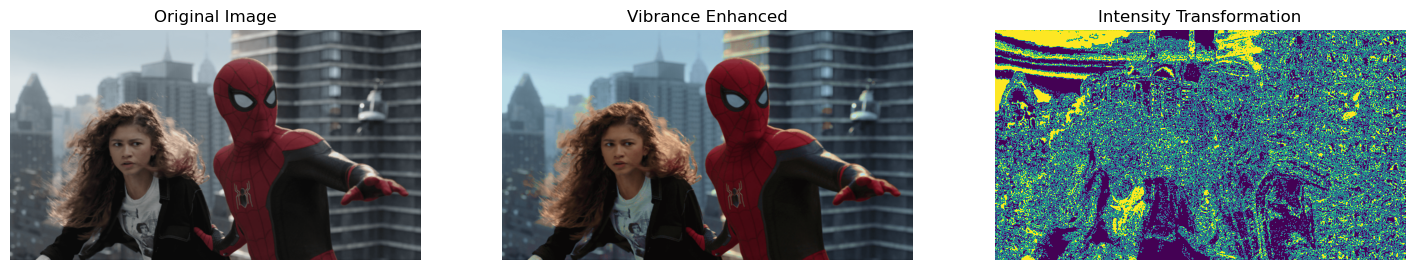

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Vibrance-enhanced image
axes[1].imshow(t_im)
axes[1].set_title('Vibrance Enhanced')
axes[1].axis('off')

# Intensity transformation
axes[2].imshow(new_s-s)
axes[2].set_title('Intensity Transformation')
axes[2].axis('off')

plt.show()

## Question 5

In [17]:
im=cv.imread('Assigment_1\\a1images\\a1images\\shells.tif', cv.IMREAD_GRAYSCALE)

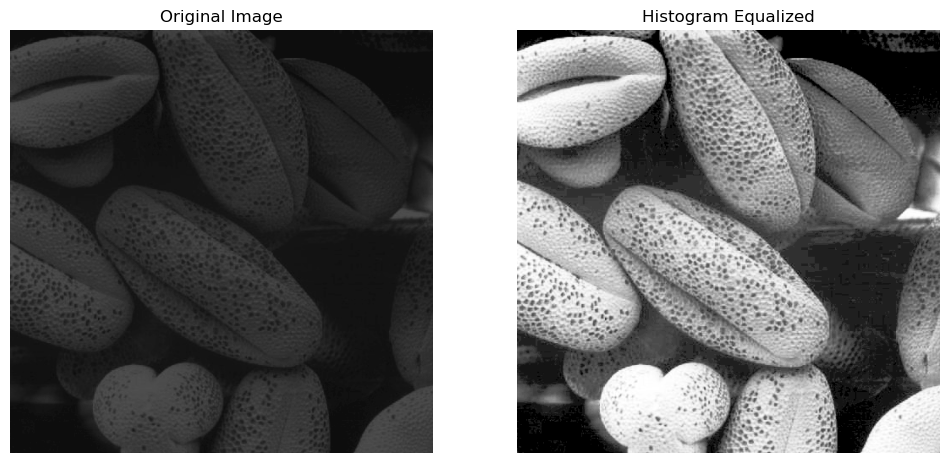

In [18]:
histrogram= np.array([np.sum(im == i) for i in range(256)])
t=np.array([np.sum(histrogram[:i]) for i in range(256)])*255/im.size
t_im=cv.LUT(im,t)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(t_im, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Histogram Equalized')
axes[1].axis('off')
plt.show()

## Question 6

In [19]:
im=cv.imread('Assigment_1\\a1images\\a1images\\jeniffer.jpg')

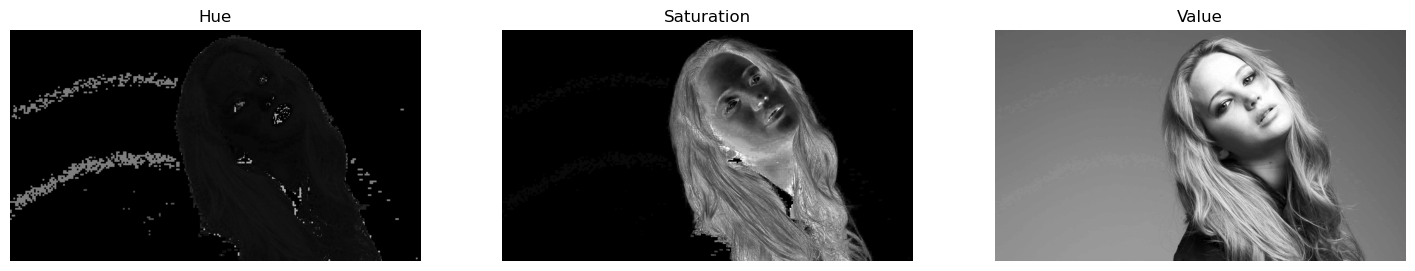

In [20]:
#1. Convert the image to HSV color space and split into H, S, V planes
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h, s, v = cv.split(im_hsv)

# Display the H, S, V planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(h, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Hue')
axes[1].imshow(s, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Saturation')
axes[2].imshow(v, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Value')
for ax in axes:
    ax.axis('off')
plt.show()

In [21]:
mask=(s>11)
forground = np.ones_like(im)
forground=cv.bitwise_and(im, im, mask=mask.astype(np.uint8))    


In [22]:
histrogram=cv.calcHist([h, s, v], [2], mask.astype(np.uint8), [256], [0, 256])

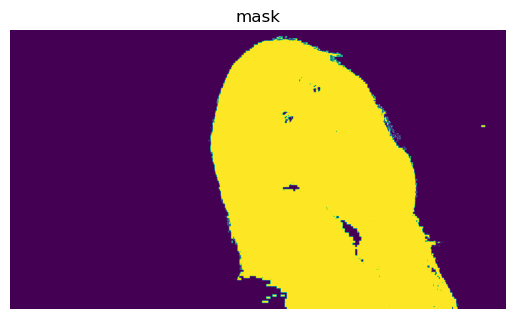

In [23]:
com_sum=np.cumsum(histrogram)
t=com_sum/com_sum[-1]*255
t_forground = np.zeros_like(forground)
t_forground[mask]=cv.LUT(forground, t.astype(np.uint8))[mask]

plt.imshow(mask)
plt.axis('off') 
plt.title("mask")
plt.show()

In [24]:
background = cv.bitwise_and(im, im, mask=(~mask).astype(np.uint8))

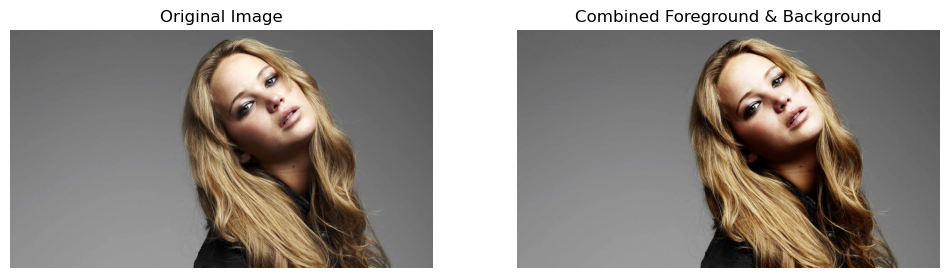

In [25]:
t_im=background+t_forground

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv.cvtColor(t_im, cv.COLOR_BGR2RGB))
axes[1].set_title('Combined Foreground & Background')
axes[1].axis('off')
plt.show()

# Question 7

In [26]:
im=cv.imread('Assigment_1\\a1images\\a1images\\einstein.png', cv.IMREAD_GRAYSCALE)

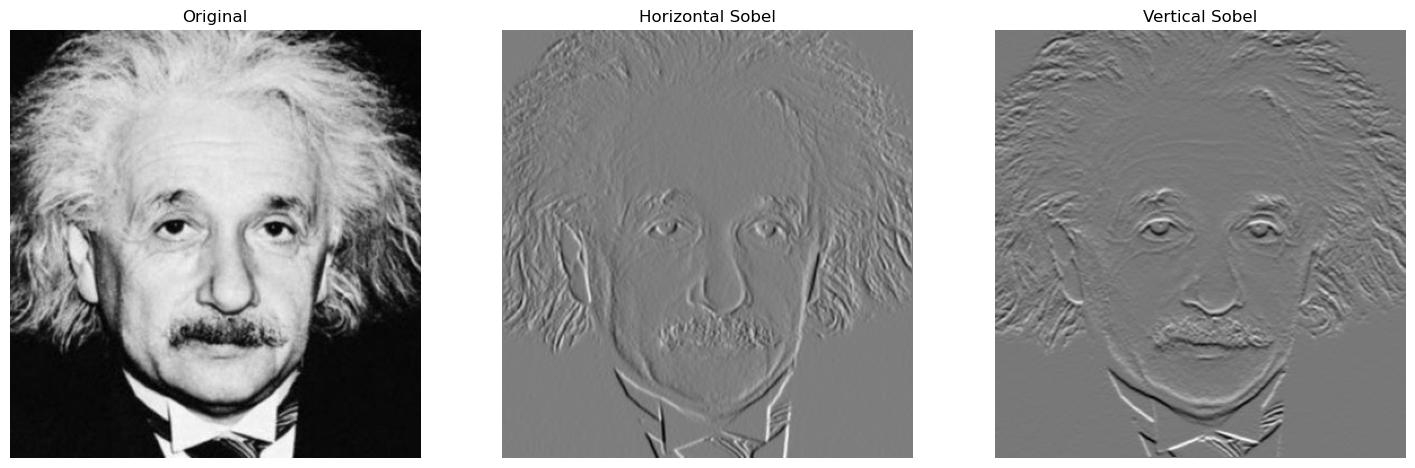

In [27]:
im_h_sobel= cv.filter2D(im,cv.CV_32F, np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]))
im_v_sobel= cv.filter2D(im,cv.CV_32F, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(im_h_sobel, cmap='gray')
axes[1].set_title('Horizontal Sobel')
axes[1].axis('off')

axes[2].imshow(im_v_sobel, cmap='gray')
axes[2].set_title('Vertical Sobel')
axes[2].axis('off')

plt.show()

In [28]:
c_im=np.zeros((im.shape[0]+2,im.shape[1]+2))
c_im[1:-1, 1:-1] = im
kernal=np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

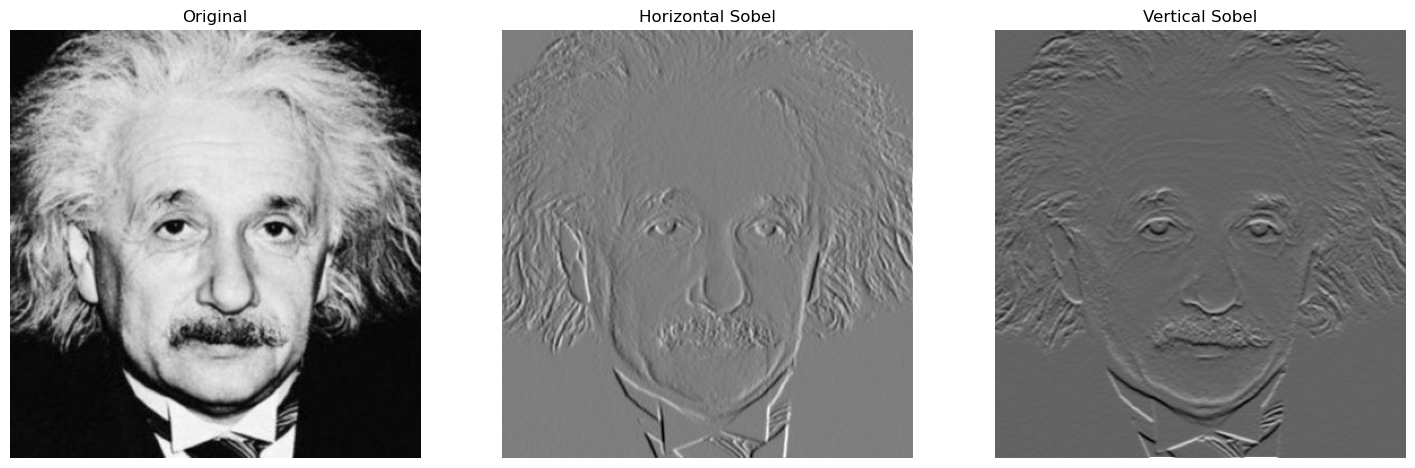

In [29]:

im_h_sobel_M =[ [(c_im[i:i+3,j:j+3]*kernal).sum() for j in range(1, im.shape[1])]for i in range(1, im.shape[0])]
im_v_sobel_M =[ [(c_im[i:i+3,j:j+3]*kernal.T).sum() for j in range(1, im.shape[1])]for i in range(1, im.shape[0])]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(im_h_sobel_M, cmap='gray')
axes[1].set_title('Horizontal Sobel')
axes[1].axis('off')

axes[2].imshow(im_v_sobel_M, cmap='gray')
axes[2].set_title('Vertical Sobel')
axes[2].axis('off')

plt.show()

Question 8

In [30]:
def nearest_neighbor_zoom(image,value):
    out=np.zeros((image.shape[0]*value,image.shape[1]*value,image.shape[2]),dtype=image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out[i*value:(i+1)*value, j*value:(j+1)*value] = image[i, j]

    return out

def bilinear_interpolation_zoom(image, value):
    out = np.zeros((image.shape[0] * value, image.shape[1] * value, image.shape[2]), dtype=image.dtype)
    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1] - 1):
            for di in range(value):
                for dj in range(value):
                    x = j * value + dj
                    y = i * value + di
                    a = image[i, j]
                    b = image[i, j + 1]
                    c = image[i + 1, j]
                    d = image[i + 1, j + 1]
                    out[y, x] = (1 - di / value) * (1 - dj / value) * a + (1 - di / value) * (dj / value) * b + (di / value) * (1 - dj / value) * c + (di / value) * (dj / value) * d
    return out



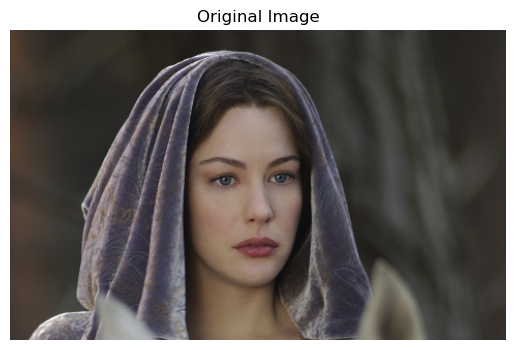

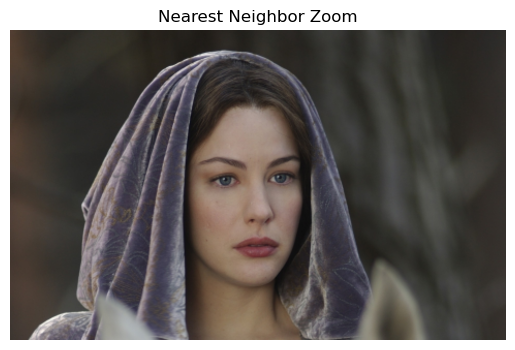

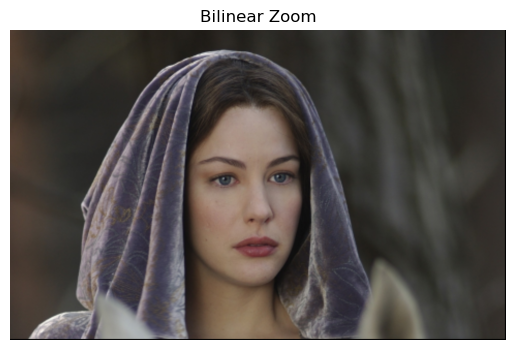

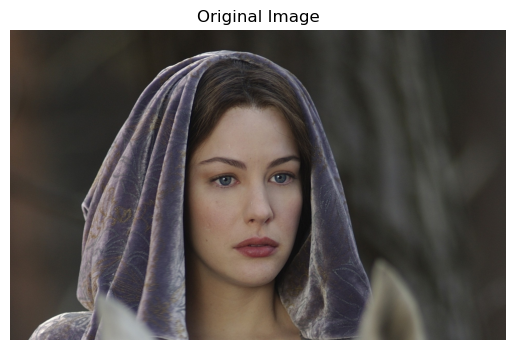

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 94.94164814814815


In [31]:
im = cv.imread('Assigment_1\\a1images\\a1images\\a1q5images\\im02small.png')
im_zoom = cv.imread('Assigment_1\\a1images\\a1images\\a1q5images\\im02.png')

value = 4  # zoom factor

#zoom
nn_zoomed = nearest_neighbor_zoom(im, value)
bilinear_zoomed = bilinear_interpolation_zoom(im, value)

# Compute normalized SSD
def normalized_ssd(im1, im2):
    ssd = np.sum((im1.astype(np.float32) - im2.astype(np.float32)) ** 2)
    norm_ssd = ssd / (im1.size)
    return norm_ssd


plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

plt.imshow(cv.cvtColor(nn_zoomed, cv.COLOR_BGR2RGB))
plt.title("Nearest Neighbor Zoom")
plt.axis("off")
plt.show()

plt.imshow(cv.cvtColor(bilinear_zoomed, cv.COLOR_BGR2RGB))
plt.title("Bilinear Zoom")
plt.axis("off")
plt.show()

plt.imshow(cv.cvtColor(im_zoom, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

nn_ssd = normalized_ssd(im_zoom, nn_zoomed )
bilinear_ssd = normalized_ssd(im_zoom, bilinear_zoomed)

print("Normalized SSD (Nearest Neighbor):", nn_ssd)
print("Normalized SSD (Bilinear):", bilinear_ssd)

In [33]:
cv.imshow("Original small", im)
cv.imshow("Nearest Neighbor Zoom", nn_zoomed)
cv.imshow("Bilinear Zoom", bilinear_zoomed)
cv.imshow("Original Image", im_zoom)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 9

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('Assigment_1\\a1images\\a1images\\daisy.jpg')
mask = np.zeros(img.shape[:2], np.uint8)  # Mask initialized to zeros

# Background and foreground models (required by grabCut, will be filled automatically)
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

# Rectangle containing the object (x, y, width, height)
rect = (0,0, img.shape[0], img.shape[1])  # Adjusted to match the image dimensions

# Apply grabCut with rectangle mode
cv2.grabCut(img, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where 0 and 2 are background, 1 and 3 are foreground
mask2 = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype("uint8")

# Apply mask to original image
foreground = img * mask2[:, :, np.newaxis]
background = cv2.subtract(img, foreground)

#blur background
blured_background=np.zeros_like(background)
blured_background[mask2==0]=cv.GaussianBlur(background, (51, 51), 0)[mask2==0]

new_image=foreground + blured_background




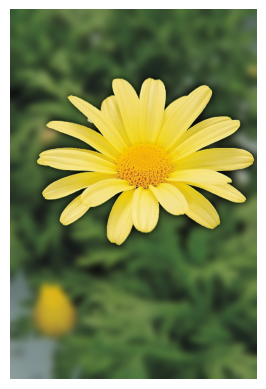

In [79]:
# Show result
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()